# Atlanta Area Allergy Pollen Count Tracking Over Time
## Script author: Siran He | 06-Mar-2025 to {date}

### Import modules

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load data

In [4]:
df_pollen = pd.read_csv("../data/pollen_count_atl.csv")
df_pollen.head()

,DATE,TREES,YEAR
0,1/1/23,NaN,2023
1,1/2/23,NaN,2023
2,1/3/23,1.0,2023
3,1/4/23,1.0,2023
4,1/5/23,29.0,2023


### Quick checks of the data

In [5]:
df_pollen.info()
df_pollen.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1096 non-null   object 
 1   TREES   571 non-null    float64
 2   YEAR    1096 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 25.8+ KB


(1096, 3)

In [6]:
# Confirm dates are correct format
df_pollen['date_dt'] = pd.to_datetime(df_pollen['DATE'])
print(df_pollen['date_dt'].dtypes)

datetime64[ns]


/tmp/ipykernel_3805/3105899157.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pollen['date_dt'] = pd.to_datetime(df_pollen['DATE'])


In [7]:
# Check date range
df_pollen['date_dt'].min() # 2023-01-01, correct
df_pollen['date_dt'].max() # 2025-12-31, correct (may extend in the future)

Timestamp('2023-01-01 00:00:00')

Timestamp('2025-12-31 00:00:00')

### Exploratory plots

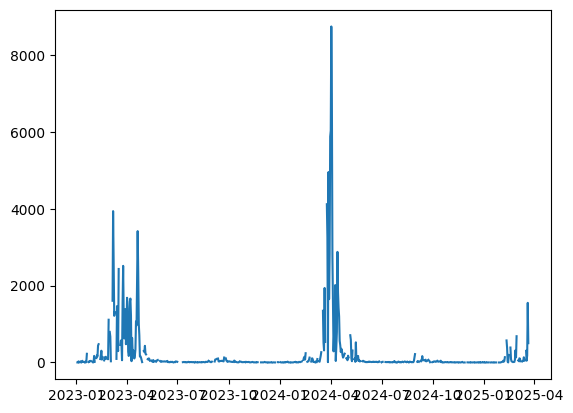

In [8]:
plt.plot(df_pollen['date_dt'], df_pollen['TREES'])  
# this is fully longitudinally data, which is ok. But we'd prefer to overlay year by year plot instead

(array([10957., 11017., 11078., 11139., 11201., 11262., 11323.]),
 [Text(10957.0, 0, '01-01'),
  Text(11017.0, 0, '03-01'),
  Text(11078.0, 0, '05-01'),
  Text(11139.0, 0, '07-01'),
  Text(11201.0, 0, '09-01'),
  Text(11262.0, 0, '11-01'),
  Text(11323.0, 0, '01-01')])

Text(0.5, 0, 'Month-Day')

Text(0, 0.5, 'TREES')

Text(0.5, 1.0, 'Overlay of Years With Daily Tree Pollen Count in ATL')

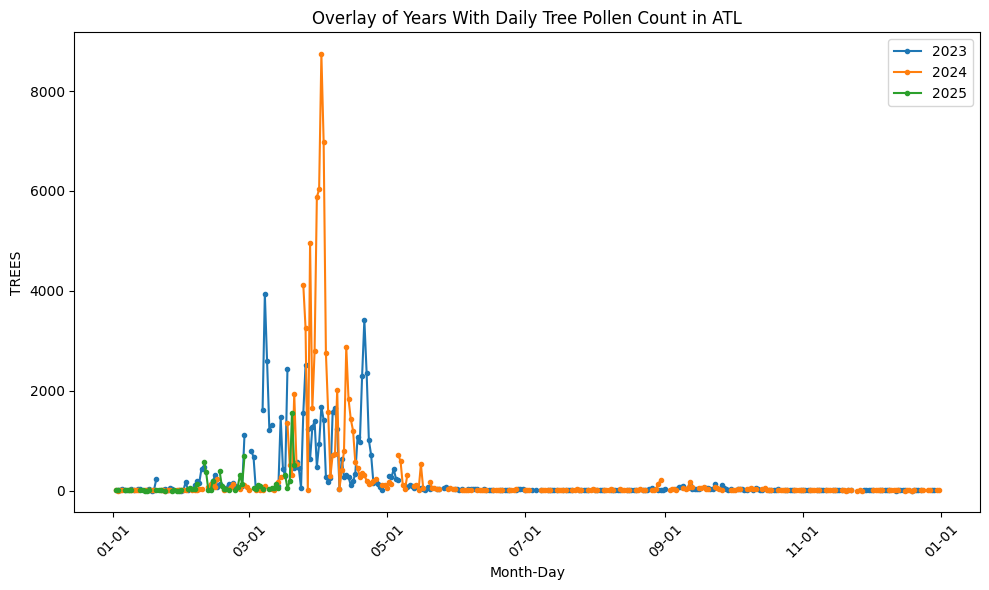

In [13]:
# # Sample data (replace with your actual data)
# data = {
#     'date': pd.to_datetime(['2023-03-10', '2023-06-15', '2024-02-29', '2024-04-01', '2025-01-20', '2025-03-01']),
#     'value': [10, 20, 15, 25, 30, 22],
#     'year': [2023, 2023, 2024, 2024, 2025, 2025]
# }
# df = pd.DataFrame(data)

# Normalize dates to the year 2000 (a leap year)
df_pollen['normalized_date'] = df_pollen['date_dt'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group data by year and plot
for year, group in df_pollen.groupby('YEAR'):
    ax.plot(group['normalized_date'], group['TREES'], marker='.', linestyle='-', label=year)

# Format the x-axis to show month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# # set date range (other wise shows up as 1/1 to 1/1)
# start_date = datetime.datetime.strptime('01-01', '%m-%d')
# end_date = datetime.datetime.strptime('12-31', '%m-%d')
# plt.xlim(mdates.date2num(start_date), mdates.date2num(end_date))

# Add labels and title
ax.set_xlabel('Month-Day')
ax.set_ylabel('TREES')
ax.set_title('Overlay of Years With Daily Tree Pollen Count in ATL')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### ARCHIVED CODES -------

In [10]:
# Split 2023, 2024, and 2025 data

df_2023 = df_pollen[(df_pollen['date_dt'] >= '2023-01-01') & (df_pollen['date_dt'] <= '2023-12-31')]
df_2023.shape

df_2023['date_dt'].min() # 2023-01-01, correct
df_2023['date_dt'].max() # 2023-12-31, correct

(365, 5)

Timestamp('2023-01-01 00:00:00')

Timestamp('2023-12-31 00:00:00')

In [11]:
df_2024 = df_pollen[(df_pollen['date_dt'] >= '2024-01-01') & (df_pollen['date_dt'] <= '2024-12-31')]
df_2024.shape

df_2024['date_dt'].min() # 2024-01-01, correct
df_2024['date_dt'].max() # 2024-12-31, correct

(366, 5)

Timestamp('2024-01-01 00:00:00')

Timestamp('2024-12-31 00:00:00')

In [12]:
df_2025 = df_pollen[(df_pollen['date_dt'] >= '2025-01-01') & (df_pollen['date_dt'] <= '2025-12-31')]
df_2025.shape

df_2025['date_dt'].min() # 2025-01-01, correct
df_2025['date_dt'].max() # 2025-12-31, correct

(365, 5)

Timestamp('2025-01-01 00:00:00')

Timestamp('2025-12-31 00:00:00')